In [9]:
import pandas as pd
from sklearn import preprocessing

In [2]:
#https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,1,-1)
    corr_df['Sign2'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    #k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign2']
    k2['Value'] = k2['SHAP_abs'] * k2['Sign']
    k2.to_csv('webcontent_features.csv',index=False)
    ax = k2.plot.barh(x='Variable',y='Value',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")

In [3]:
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay

In [6]:
web_features1 = []
web_features0 = []
tmp = []

for batch in range(0,100):
    with open('./labeled_feature_data_local_html/web_content_features_1_'+str(batch)+'.pkl', 'rb') as f:
        web_features1 += pickle.load(f)
        

    with open('./labeled_feature_data_local_html/web_content_features_0_'+str(batch)+'.pkl', 'rb') as f:
        web_features0 += pickle.load(f)

#print('content feature')
#print(web_features1)
#print(web_features0)
#print(len(web_features1))
#print(len(web_features0))


web_not_working = [ind for ind,ft in enumerate(web_features1) if ft[0] =='Empty']
web_not_english = [ind for ind,ft in enumerate(web_features1) if ft[0] =='Non-EN']
web_not = [ind for ind,ft in enumerate(web_features1) if len(ft) <=9]
#print(web_features1[1])
web_features1 = [ft for ft in web_features1 if len(ft) >9]



unwhite_tb = pd.DataFrame(web_features1)
unwhite_tb['label'] = 1

#print(web_features0)
web_not_working2 = [ind for ind,ft in enumerate(web_features0) if ft[0] =='Empty']
web_not_english2 = [ind for ind,ft in enumerate(web_features0) if ft[0] =='Non-EN']
web_features0 = [ft for ft in web_features0 if len(ft) >9]


white_tb = pd.DataFrame(web_features0)
white_tb['label'] = 0

#print(len(web_features1))
#print(len(web_features0))

all_tb = pd.concat([unwhite_tb,white_tb]).reset_index(drop=True).sample(frac=1, random_state=0)

X1 = all_tb.loc[:, all_tb.columns != 'label']
y1 = all_tb.loc[:, all_tb.columns == 'label']

In [7]:
clf = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)

In [10]:
scaler = preprocessing.StandardScaler().fit(X1[100:])

In [11]:
clf.fit(scaler.transform(X1[100:]),y1[100:])

/tmp/ipykernel_26854/3845615678.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(scaler.transform(X1[100:]),y1[100:])


RandomForestClassifier(max_depth=20, n_estimators=500, random_state=0)

In [12]:
import shap
shap_values = shap.TreeExplainer(clf).shap_values(X1[:100])

In [13]:
test = X1[:100].rename(columns={10:'editor prestige',11:'editor count',12:'authorship',13:'conflict',14:'copyright',15:'peer review',16:'latest issue'})

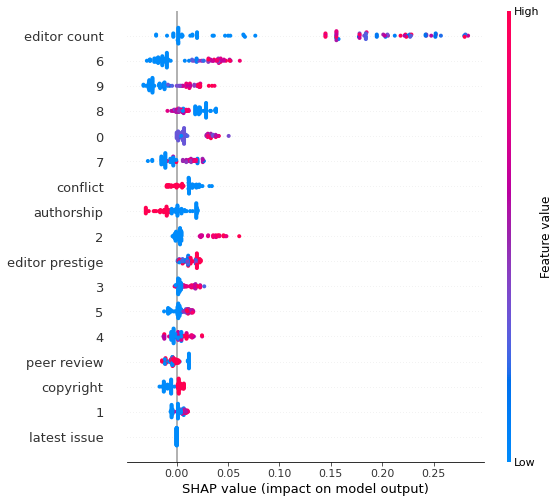

In [14]:
shap.summary_plot(shap_values[1], test,max_display=30)

In [ ]:
#import shap
#shap_values = shap.TreeExplainer(clf).shap_values(X1)

In [ ]:
#ABS_SHAP(shap_values[0],X1)

In [16]:
abs_features1 = []
abs_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_content_features_1_'+str(batch)+'_abs.pkl', 'rb') as f:
        tmp = pickle.load(f)
        #print(tmp)
        dt = [[tt for tt in t if len(tt) == 10] for t in tmp if len(t) >0 and len([tt for tt in t if len(tt)==10])]
        #print(dat)
        abs_features1 += [np.mean(np.array(t), axis=0) for t in dt]

    with open('./labeled_feature_data_local_html/web_content_features_0_'+str(batch)+'_abs.pkl', 'rb') as f:
        tmp = pickle.load(f)
        dt = [[tt for tt in t if len(tt) == 10] for t in tmp if len(t) >0 and len([tt for tt in t if len(tt)==10])]
        
        abs_features0 += [np.mean(np.array(t), axis=0) for t in dt]

#print('abstract feature')
#print(abs_features1)
#print(abs_features0)
#print(len(abs_features1))
#print(len(abs_features0))


#abs_features1 = [np.mean(np.array(ft), axis=0) for ft in abs_features1 if len([f for f in ft if len(f) == 10]) > 0]



unwhite_tb = pd.DataFrame(abs_features1)
unwhite_tb['label'] = 1

#abs_features0 = [np.mean(np.array(ft), axis=0) for ft in abs_features0 if len([f for f in ft if len(f) == 10]) > 0]


white_tb = pd.DataFrame(abs_features0)
white_tb['label'] = 0

#print(len(abs_features1))
#print(abs_features1)
#print(len(abs_features0))

all_tb = pd.concat([unwhite_tb,white_tb]).reset_index(drop=True).sample(frac=1,random_state=0)

X2 = all_tb.loc[:, all_tb.columns != 'label']
y2 = all_tb.loc[:, all_tb.columns == 'label']

In [17]:
scaler = preprocessing.StandardScaler().fit(X2[100:])

In [18]:
clf.fit(scaler.transform(X2[100:]),y2[100:])

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(max_depth=20, n_estimators=500, random_state=0)

In [19]:
import shap
shap_values = shap.TreeExplainer(clf).shap_values(X2[:100])

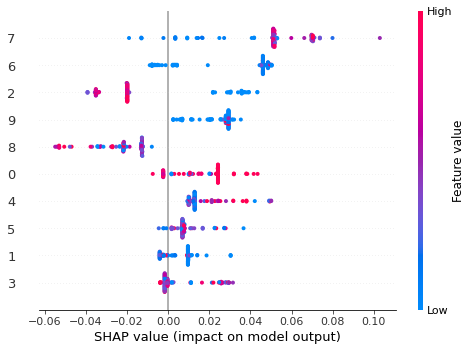

In [20]:
shap.summary_plot(shap_values[1], X2[:100],max_display=30)

In [21]:
#drop two duplicated columns: save value but different column name
bibilometrics = pd.read_csv('labeled_journals_biblio_features_all.csv').drop(columns=['journal_paper_cited_num','journal_journal_reference_num'])

In [22]:
bibilometrics.shape

(5783, 26)

In [23]:
bibilometrics = bibilometrics.reindex(columns=['JournalId','NormalizedName','Issn','Reason','journal_year_first_publish',
                               'total_num_journal_cited','num_journal_publication','total_num_journal_reference','journal_num_journal_self_cited',
                              'journal_journal_cited_num','journal_paper_reference_num','journal_num_journal_self_reference',
                              'journal_avg_last_author_hindex','journal_num_author_self_cited',
                              'num_journal_author','journal_num_author_self_reference','journal_num_author_referenced',
                               'journal_avg_middle_author_hindex','journal_avg_first_author_hindex','journal_avg_hindex',
                               'journal_num_author_cited','journal_num_affiliation_cited','journal_num_affiliation_self_cited',
                               'num_journal_affiliation','journal_num_affiliation_referenced','journal_num_affiliation_self_reference'
                              ])

In [24]:
bibilometrics.shape

(5783, 26)

In [25]:
white_bib = bibilometrics[bibilometrics['Reason'] == 'Still in DOAJ index'].drop(columns=['JournalId', 'NormalizedName','Issn','Reason'])
white_bib['label'] = 0
unwhite_bib = bibilometrics[bibilometrics['Reason'] != 'Still in DOAJ index'].drop(columns=['JournalId', 'NormalizedName','Issn','Reason'])
unwhite_bib['label'] = 1

In [28]:
all_tb = pd.concat([unwhite_bib,white_bib]).reset_index(drop=True).sample(frac=1, random_state=0)

X6 = all_tb.loc[:, all_tb.columns != 'label']
y6 = all_tb.loc[:, all_tb.columns == 'label']

In [29]:
all_tb.shape

(5783, 23)

In [30]:
X6.columns

Index(['journal_year_first_publish', 'total_num_journal_cited',
       'num_journal_publication', 'total_num_journal_reference',
       'journal_num_journal_self_cited', 'journal_journal_cited_num',
       'journal_paper_reference_num', 'journal_num_journal_self_reference',
       'journal_avg_last_author_hindex', 'journal_num_author_self_cited',
       'num_journal_author', 'journal_num_author_self_reference',
       'journal_num_author_referenced', 'journal_avg_middle_author_hindex',
       'journal_avg_first_author_hindex', 'journal_avg_hindex',
       'journal_num_author_cited', 'journal_num_affiliation_cited',
       'journal_num_affiliation_self_cited', 'num_journal_affiliation',
       'journal_num_affiliation_referenced',
       'journal_num_affiliation_self_reference'],
      dtype='object')

In [31]:
clf = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)

In [32]:
scaler = preprocessing.StandardScaler().fit(X6[100:])

In [33]:
clf.fit(scaler.transform(X6[100:]),y6[100:])

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(max_depth=20, n_estimators=500, random_state=0)

In [34]:
import shap
shap_values = shap.TreeExplainer(clf).shap_values(scaler.transform(X6[:100]))

In [35]:
shap_values[1][:,:8]

array([[-5.73722172e-02,  4.78339541e-03, -4.69544959e-03,
         2.05122878e-02,  2.01800943e-02,  3.45920062e-02,
         2.38004674e-03,  2.92377896e-02],
       [ 3.26520345e-02, -9.50411765e-03,  7.23412839e-03,
        -1.47541840e-02,  2.43822705e-02, -1.61374197e-02,
        -3.39021124e-03,  2.31967922e-02],
       [-1.11381864e-02, -1.73700713e-02, -1.51645174e-02,
        -1.23936628e-02,  4.14056646e-03, -7.83267244e-02,
        -8.17641620e-03,  2.90724378e-03],
       [ 2.68136036e-03, -1.75191054e-03, -7.90566651e-03,
         2.41850841e-03, -1.45643733e-02,  5.37282224e-03,
        -2.44003551e-03, -1.88736891e-02],
       [ 1.26169226e-02, -9.81341746e-04,  8.02097521e-03,
        -2.24643993e-02,  1.67935548e-02, -5.71772871e-04,
        -9.96935464e-03,  1.57189786e-02],
       [ 3.09570255e-03, -1.46374995e-02, -1.80128591e-02,
        -6.14343012e-03,  1.18886400e-02, -7.80904172e-02,
        -1.08993319e-02,  1.31112768e-02],
       [ 5.11580147e-02,  2.341554

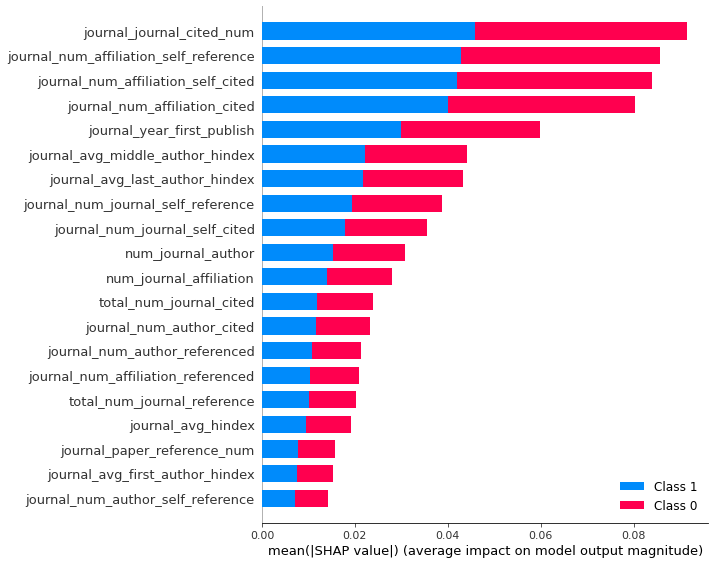

In [36]:
shap.summary_plot(shap_values, X6[:100], plot_type="bar")

In [37]:
import matplotlib as plt

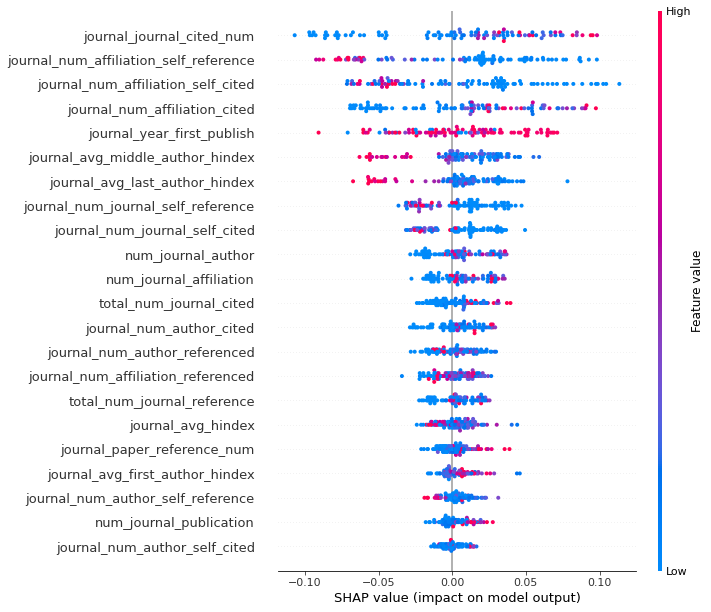

In [38]:
shap.summary_plot(shap_values[1], X6[:100],max_display=30)

In [39]:
X6.iloc[:100,:8]

,journal_year_first_publish,total_num_journal_cited,num_journal_publication,total_num_journal_reference,journal_num_journal_self_cited,journal_journal_cited_num,journal_paper_reference_num,journal_num_journal_self_reference
3862,2014,495,102,2725,2,239,79,2
2812,2011,145,689,921,1,80,84,1
5105,2015,68,124,417,3,32,52,3
3501,2012,2717,395,14219,65,541,387,71
1161,1984,540,62,493,0,101,34,0
...,...,...,...,...,...,...,...,...
1718,2006,9931,1375,30775,323,1340,1347,320
3775,2004,52,365,0,0,11,0,0
818,1972,1153,1041,10476,17,551,609,16
2272,2015,1252,336,10159,19,422,308,22


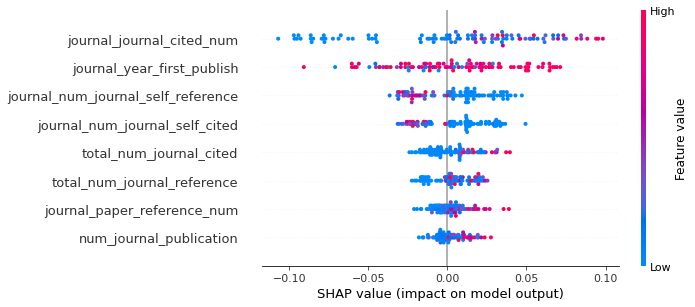

In [41]:
shap.summary_plot(shap_values[1][:,:8], X6.iloc[:100,:8])

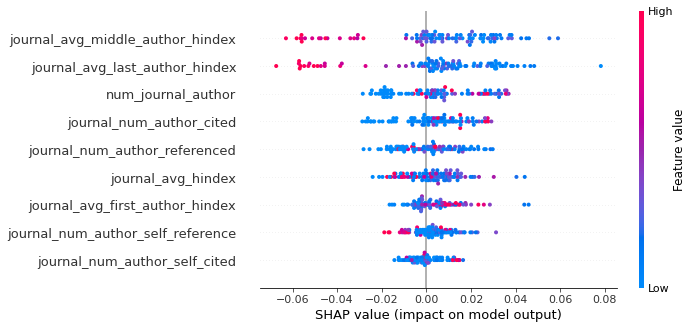

In [42]:
shap.summary_plot(shap_values[1][:,8:17], X6.iloc[:100,8:17])

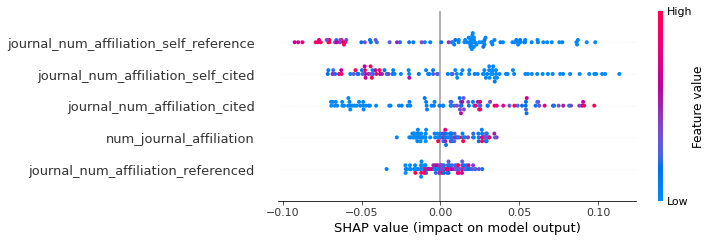

In [43]:
shap.summary_plot(shap_values[1][:,17:], X6.iloc[:100,17:])

In [5]:
tag_features1 = []
tag_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_html_tag_features_1_'+str(batch)+'.pkl', 'rb') as f:
        tag_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_html_tag_features_0_'+str(batch)+'.pkl', 'rb') as f:
        tag_features0 += pickle.load(f)

print('tag feature')
print(len(tag_features1))
#print(tag_features1)
print(len(tag_features0))
#print(tag_features0)

tag_features1 = [ft for ind,ft in enumerate(tag_features1) if len(ft) >1]
tag_features0 = [ft for ind,ft in enumerate(tag_features0) if len(ft) >1]

print(len(tag_features1))
print(len(tag_features0))

data = tag_features1 + tag_features0
label = [1 for ft in tag_features1] + [0 for ft in tag_features0]



vectorizer = TfidfVectorizer()
X2 = vectorizer.fit_transform(data)
y2 = np.array(label)

tag feature
5375
13977
5198
13826


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.005, random_state=0)

In [8]:
X2_test

<96x747 sparse matrix of type '<class 'numpy.float64'>'
	with 2615 stored elements in Compressed Sparse Row format>

In [9]:
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0).fit(X2_train, y2_train)

In [11]:
import shap

In [12]:
shap_values = shap.TreeExplainer(classifier).shap_values(X2_test.todense())

In [13]:
test = pd.DataFrame(X2_test.todense())

In [14]:
test.columns = vectorizer.get_feature_names_out()

In [15]:
test

,12,489114,aafp,abbr,abstract,ac,accordion,accordiontab,aclass,acronym,...,wrapper,www,xaver,xdoor,xpl,xplore,xref,xsl,zendesk,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


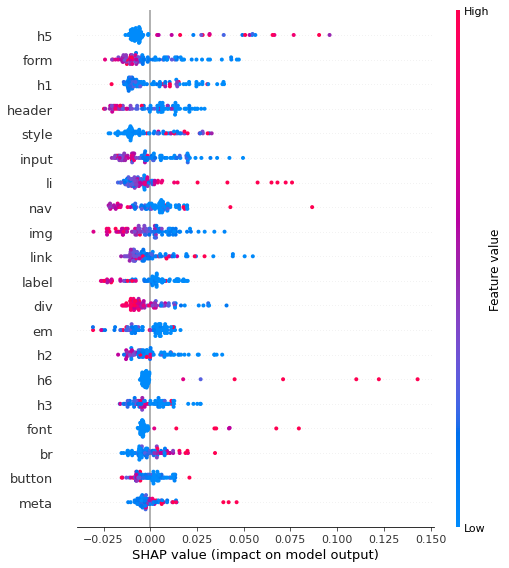

In [16]:
shap.summary_plot(shap_values[1], test)

In [17]:
font_features1 = []
font_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_font_features_1_'+str(batch)+'.pkl', 'rb') as f:
        font_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_font_features_0_'+str(batch)+'.pkl', 'rb') as f:
        font_features0 += pickle.load(f)

print('font feature')
print(len(font_features1))
print(len(font_features0))
font_feature1 = [ft for ind,ft in enumerate(font_features1) if len(ft) > 0]
font_feature0 = [ft for ind,ft in enumerate(font_features0) if len(ft) > 0]
font_feature = font_feature1 + font_feature0
label = [1 for ft in font_feature1] + [0 for ft in font_feature0]

print(len(font_feature1))
print(len(font_feature0))

vectorizer = TfidfVectorizer()
X3 = vectorizer.fit_transform([' '.join(ff) for ff in font_feature])
y3 = np.array(label)

font feature
5375
13977
2277
6749


In [18]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.005, random_state=0)

In [19]:
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0).fit(X3_train, y3_train)

In [20]:
shap_values = shap.TreeExplainer(classifier).shap_values(X3_test.todense())

In [21]:
test = pd.DataFrame(X3_test.todense())

In [22]:
test.columns = vectorizer.get_feature_names_out()

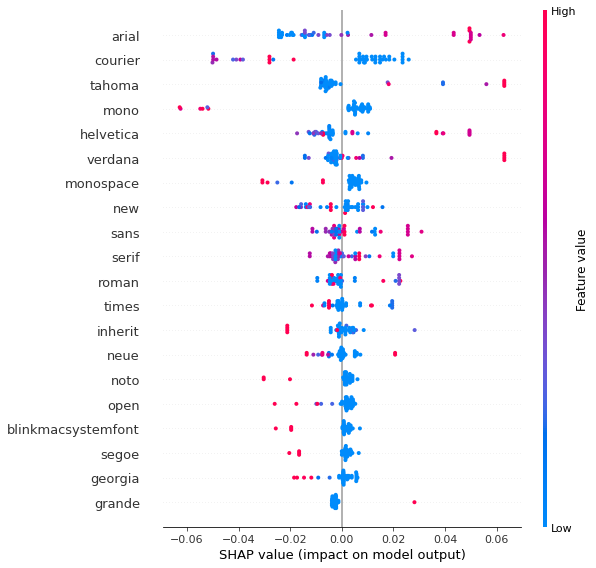

In [23]:
shap.summary_plot(shap_values[1], test)

In [24]:
color_features1 = []
color_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_color_features_1_'+str(batch)+'.pkl', 'rb') as f:
        color_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_color_features_0_'+str(batch)+'.pkl', 'rb') as f:
        color_features0 += pickle.load(f)

print('color feature')
#print(color_features1)
#print(color_features0)
color_features1 = [ft for ind,ft in enumerate(color_features1) if len(ft) ==5]
color_features0 = [ft for ind,ft in enumerate(color_features0) if len(ft) ==5]
website_colors = color_features1 + color_features0
label = [1 for ft in color_features1] + [0 for ft in color_features0]


vectorizer = TfidfVectorizer()
X4 = vectorizer.fit_transform([' '.join(set(ff)) for ff in website_colors])
y4 = np.array(label)

color feature


In [25]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.005, random_state=0)

In [26]:
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0).fit(X4_train, y4_train)

In [27]:
shap_values = shap.TreeExplainer(classifier).shap_values(X4_test.todense())

In [28]:
test = pd.DataFrame(X4_test.todense())

In [29]:
test.columns = vectorizer.get_feature_names_out()

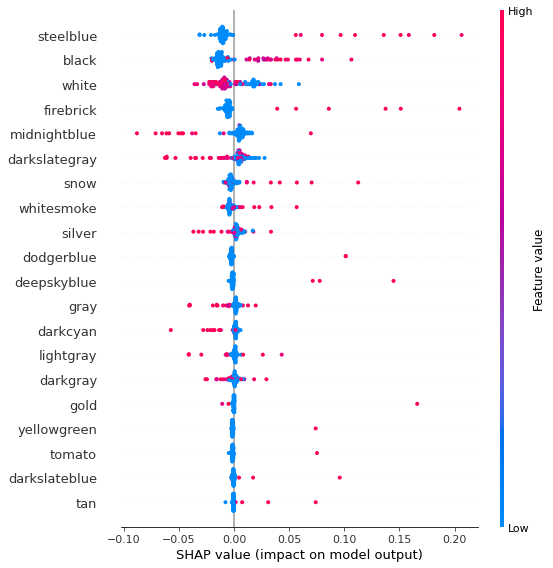

In [30]:
shap.summary_plot(shap_values[1], test)